<a href="https://colab.research.google.com/github/Graviton12/Comparative-Analysis-of-Regression-Models/blob/main/LR_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-Class Assignment: Exploring Regression Techniques
Objective:
The goal of this assignment is to apply five regression techniques—Multiple Linear Regression (MLR), Stochastic Gradient Descent (SGD), Ridge Regression, Lasso Regression, and Polynomial Regression—on a from Kaggle. You will compare the performance of these models and interpret the results.
https://www.kaggle.com/datasets/CooperUnion/cardataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import necessary libraries

In [ ]:
# general importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# regression importing
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
# Load a dataset
car_data = pd.read_csv('/content/drive/MyDrive/CS 430/Regression Analysis/data.csv')


In [ ]:
# Check data
car_data.head(8)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300


## What are the basic properties of the dataset

- What is the shape of the dataset (number of rows and columns)?
- What are the column names, and what do they represent?
- What is the data type of each column?

In [ ]:
# viewing the shape of the dataset
car_data.shape
# there are 11,914 rows and 16 columns

(11914, 16)

In [ ]:
# viewing the column names of the dataset
car_data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

* The Make refers to the maker/brand of the car
* model refers to the specific
* model of the car
* year refers to what year the car is from/made in
* engine fuel type represents the type of fuel the engine uses
* engine HP refers to the engine's horsepower
* Engine cylinder refers to the type of cylinder for the engine
* transmission type refers to if the car is manual or automatic
* Driven_Wheels is either rear wheels, front wheels, or all wheels.
* Number of Doors is the unmber of doors that car has
* Market Category refers to the type of market the car is in depedning on if it is a uxury car or regular car.
* Vehicle Size is the size of the car
* Vehicle Style is the style of the car
* highway MPG refers to miles per gallon of fuel consumed while highway driving.
* city mpg refers to the miles per gall on fuel consumed while city driving.
* Popularity refers to how popular the car is  
* MSRP refers to the car price

In [ ]:
# checking the data type for each column of the dataset
car_data.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


In [ ]:
# checking the information on the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Missing Data
- Are there any missing values in the dataset?
- Which columns have missing values, and how many?

In [ ]:
# checking for missing values
car_data.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


Engine fuel type has 3 missing values, Engine HP has 69 missing values, engine cylinders have 30 missing values, and market category had 3,742 missing values.

### Descriptive Statistics:
- What are the summary statistics of the numerical columns?
- What are the mean, median, min, max, and standard deviation of the numerical columns?

In [ ]:
# viewing statistics for the data
car_data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Target Variable:
How is the target variable distributed?

If the target variable is numerical (e.g., house prices, car prices or insurance charges), plot a histogram to visualize its distribution.

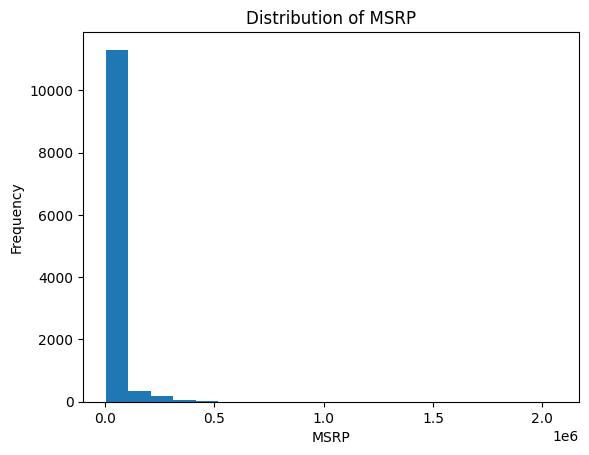

In [ ]:
# creating a histogram to display the dictrubtion of MSRP
plt.hist(car_data['MSRP'], bins=20)
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.title('Distribution of MSRP')
plt.show()

Lower Fence: -10846.875
Upper Fence: 74078.125


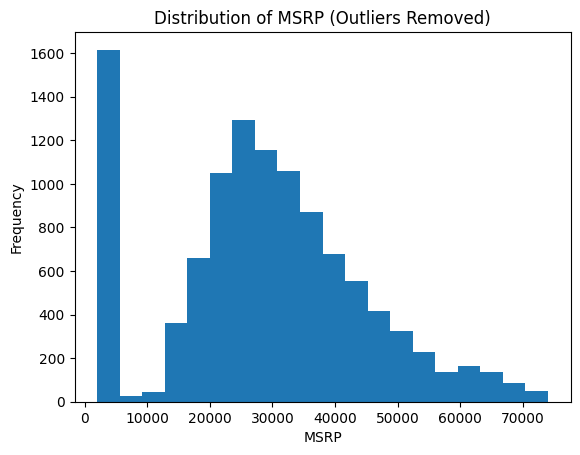

In [ ]:
# finding the upper fence and lower fence of MSRP to identify outliers
Q1 = car_data['MSRP'].quantile(0.25)
Q3 = car_data['MSRP'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
print("Lower Fence:", lower_fence)
print("Upper Fence:", upper_fence)

# creating a new histogram with the outliers removed
plt.hist(car_data['MSRP'][car_data['MSRP'] < upper_fence], bins=20)
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.title('Distribution of MSRP (Outliers Removed)')
plt.show()

### Relationships Between Features:
- Are there correlations between the numerical variables?

- Are there features that are highly correlated (positively or negatively)?
- How does each feature correlate with the target variable?

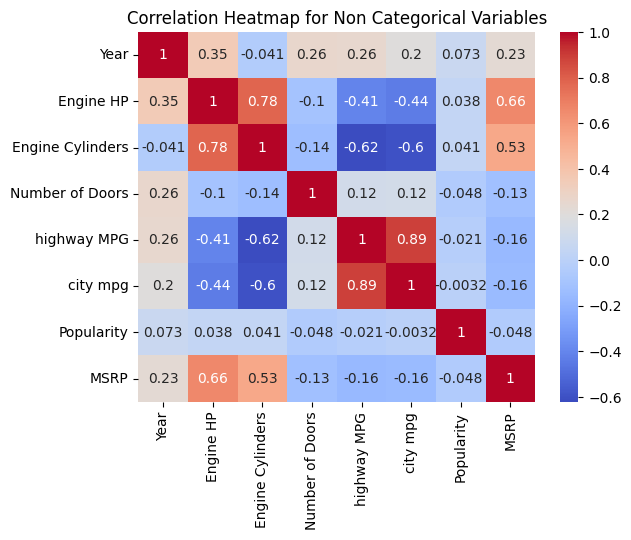

In [ ]:
# creating a corelation matrix heat map to view possible correlations for numerica variables only
corr_matrix = car_data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Non Categorical Variables')
plt.show()

There is a very strong postive correlation between city mpg and highway mpg with a value of 0.86. There is a strong postive correlation between engine cylinders and engine HP with a value of 0.78. Additionally, there is a somewhat strong negtive correlation between highway mpg anf engine cylinder with -0.62 as the value. Moreover, there is a somewhat strong negtive correlation between city mpg anf engine cylinder.

Regarding our target variable MSRP, there is a somewhat strong postive correlation between engine HP and MSRP as well as with engine cylinder and MSRP.

### Are there any potential outliers in the dataset?
- Use boxplots or scatter plots to identify potential outliers.
- Should outliers be removed or dealt with in some other way?

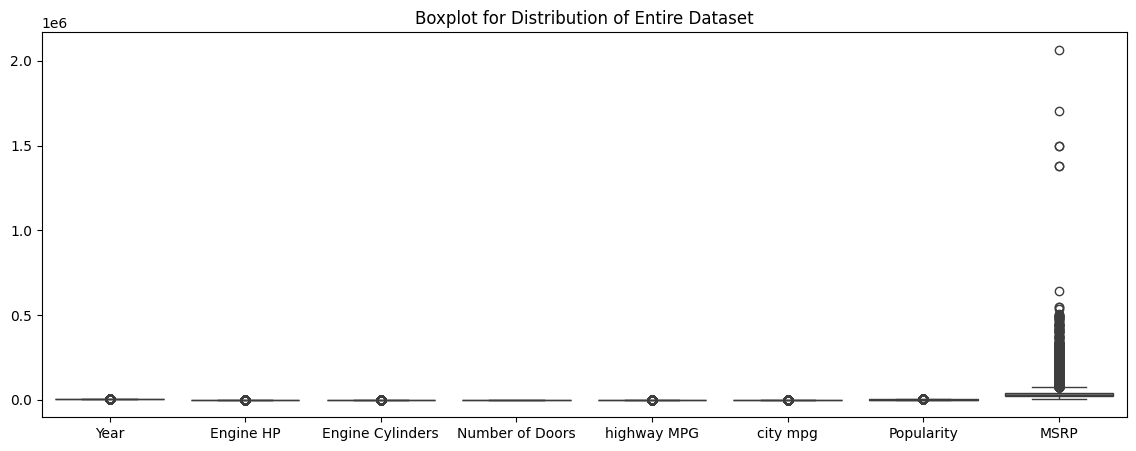

In [ ]:
# creating a box plot to view the distribution of the entire daatset plus its potenia outliers
plt.figure(figsize=(14, 5))
sns.boxplot(data=car_data)
plt.title('Boxplot for Distribution of Entire Dataset')
plt.show()

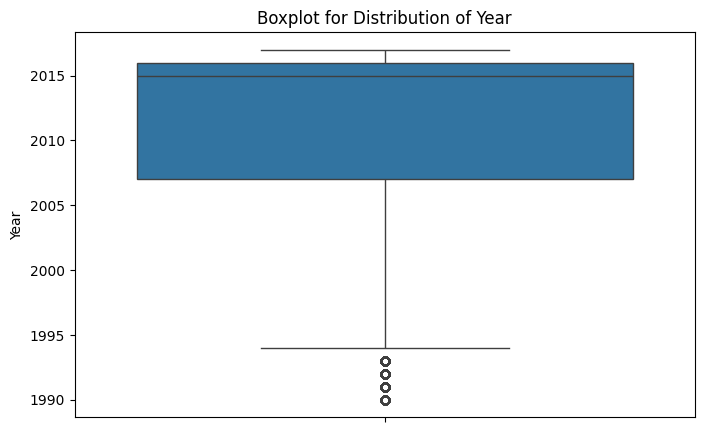

In [ ]:
# box plot for year
plt.figure(figsize=(8, 5))
sns.boxplot(data=car_data['Year'])
plt.title('Boxplot for Distribution of Year')
plt.show()

Based on the boxplot, year has 4 outliers.

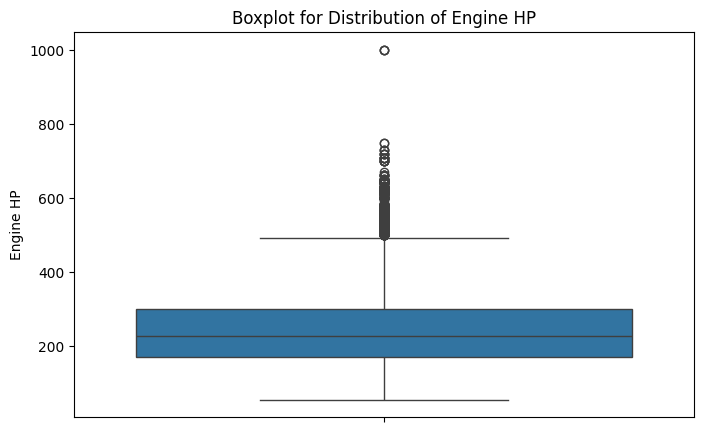

In [ ]:
# box plot for Engine HP
plt.figure(figsize=(8, 5))
sns.boxplot(data=car_data['Engine HP'])
plt.title('Boxplot for Distribution of Engine HP')
plt.show()

Engine HP has numerous outliers based on the box plot.

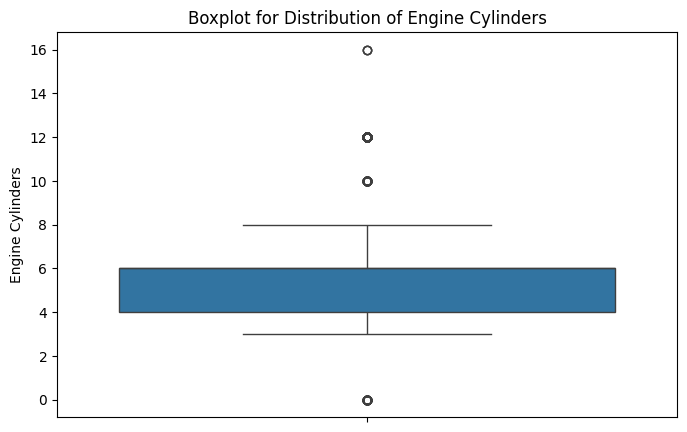

In [ ]:
# box plot for Engine CYlinders
plt.figure(figsize=(8, 5))
sns.boxplot(data=car_data['Engine Cylinders'])
plt.title('Boxplot for Distribution of Engine Cylinders')
plt.show()

Based on the box plot, engine cylinders has 4 outliers.

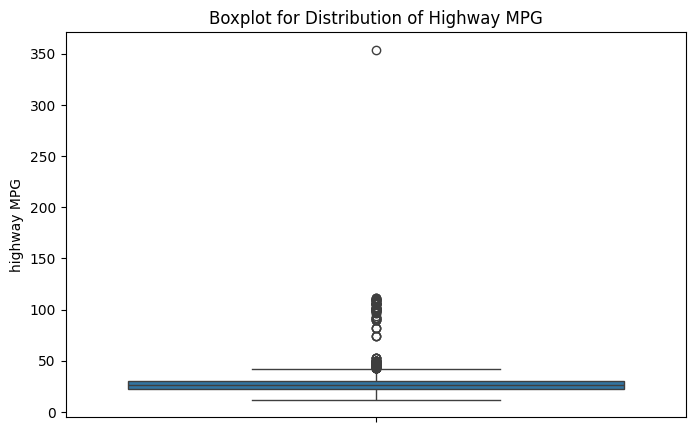

In [ ]:
# Box plot for Highway MPG
plt.figure(figsize=(8, 5))
sns.boxplot(data=car_data['highway MPG'])
plt.title('Boxplot for Distribution of Highway MPG')
plt.show()

There are numerous outliers for Highway MPG based on the boxplot.

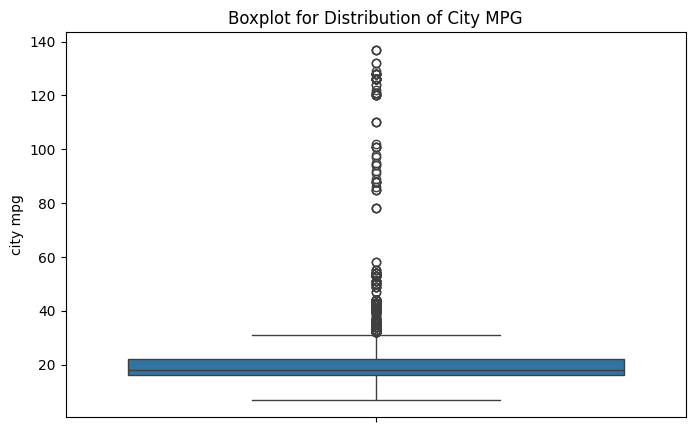

In [ ]:
# box ply for City MPG
plt.figure(figsize=(8, 5))
sns.boxplot(data=car_data['city mpg'])
plt.title('Boxplot for Distribution of City MPG')
plt.show()

There are numerous outliers for city MPG based on the boxplot.

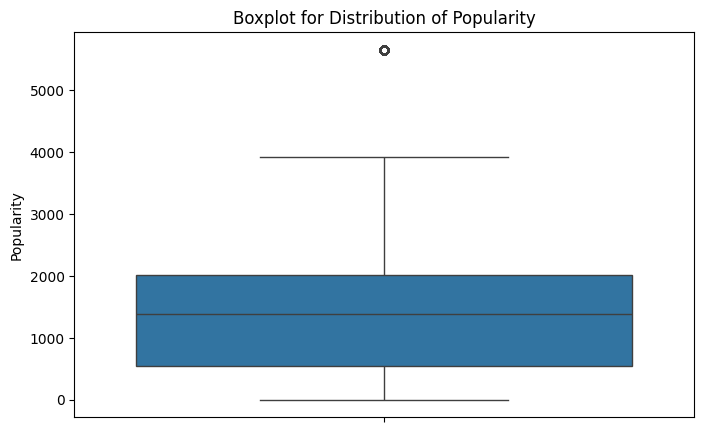

In [ ]:
# box plot for popularity
plt.figure(figsize=(8, 5))
sns.boxplot(data=car_data['Popularity'])
plt.title('Boxplot for Distribution of Popularity')
plt.show()

There is one outier for popularity based on the box plot.

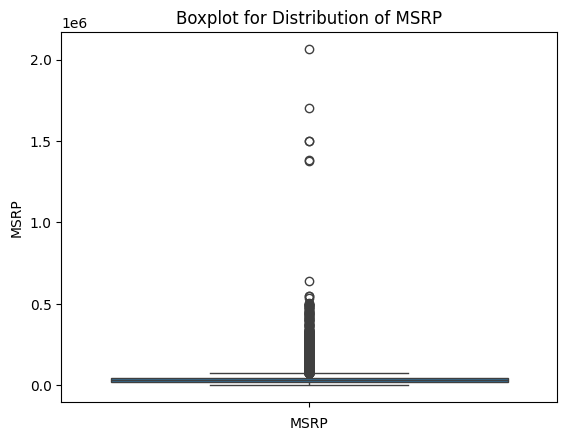

In [ ]:
# plotting a boxplot to display the distribtuion of the MSRP plus its potenial outliers
sns.boxplot(car_data['MSRP'])
plt.title('Boxplot for Distribution of MSRP')
plt.xlabel('MSRP')
plt.show()

Based on the box plot for the entire dataset and the box plot for just MSRP, it is evident that there are at least six outliers for our target variable MSRP.

### Data Cleaning:
- Are there any issues in the data that need to be cleaned?

- Are there duplicated rows that should be removed?

In [ ]:
# for numerical columns with missing values, fill in the missing values using mean
car_data['Engine HP'].fillna(car_data['Engine HP'].mean(), inplace=True)
car_data['Engine Cylinders'].fillna(car_data['Engine Cylinders'].mean(), inplace=True)
car_data['Number of Doors'].fillna(car_data['Number of Doors'].mean(), inplace=True)

In [ ]:
# for categorical columns with missing values, fill in the missing values using mode
car_data['Engine Fuel Type'].fillna(car_data['Engine Fuel Type'].mode()[0], inplace=True)
car_data['Market Category'].fillna(car_data['Market Category'].mode()[0], inplace=True)

In [ ]:
# checking that the missing values were handled
car_data.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,0


In [ ]:
# Identify numerical and categorical columns
numerical_features = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']
categorical_features = ['Make', 'Model', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style',]

In [ ]:
# creating function to remove outliers
#def remove_outliers(column):
    #Q1 = column.quantile(0.25)
    #Q3 = column.quantile(0.75)
    #IQR = Q3 - Q1
    #lower_fence = Q1 - 1.0 * IQR
    #upper_fence = Q3 + 1.0 * IQR
    #return column[(column >= lower_fence) & (column <= upper_fence)]

# applying the function for all numerical columns without MSRP
#for column in numerical_features:
    #car_data[column] = remove_outliers(car_data[column])

In [ ]:
for col in numerical_features:
    Q1 = car_data[col].quantile(0.25)
    Q3 = car_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
car_data = car_data[(car_data[col] >= lower_fence) & (car_data[col] <= upper_fence)]

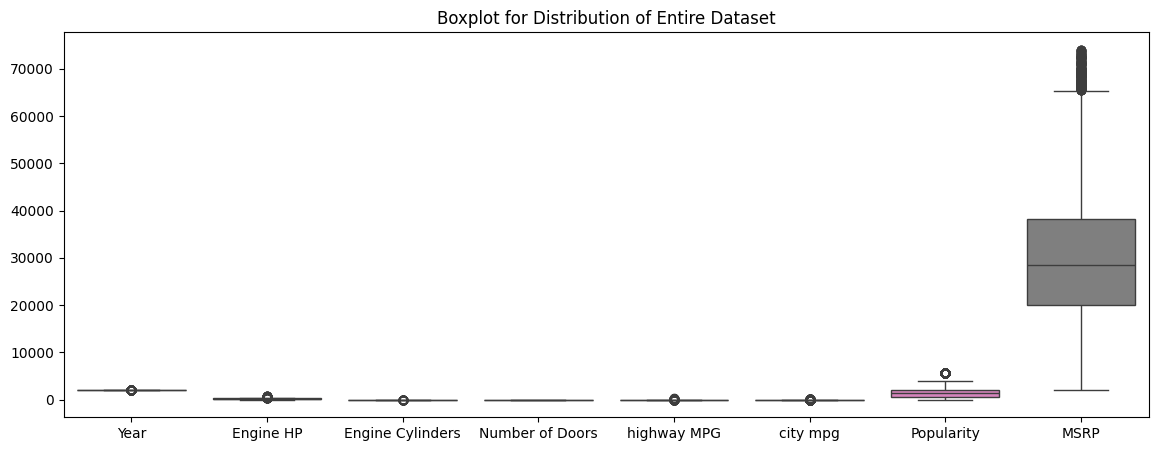

In [ ]:
# box plot
plt.figure(figsize=(14, 5))
sns.boxplot(data=car_data)
plt.title('Boxplot for Distribution of Entire Dataset')
plt.show()

Note that not all the outliers were removed but a large portion were removed.

In [ ]:
# checking for duplicate rows within the dataset
car_data.duplicated().sum()

704

In [ ]:
# removing the duplicate rows from the dataset by dropping
car_data.drop_duplicates(inplace=True)

### Split into features and target

In [ ]:
# setting the target variable and explanatory variables
X = car_data.drop('MSRP', axis=1)
y = car_data['MSRP']

In [ ]:
# checking which columns are present in X
X.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity'],
      dtype='object')

In [ ]:
# checking thr shape of X
X.shape

(10214, 15)

In [ ]:
# Checking the shape of y
y.shape

(10214,)

### Feature Engineering

In [ ]:
numerical_features = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
categorical_features = ['Make', 'Model', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']

### Preprocessing Pipelines

In [ ]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

In [ ]:
# Applying StandardScaler just for MSRP to scale y
scaler_y = StandardScaler()
y = scaler_y.fit_transform(np.array(np.reshape(y.values, (-1, 1))))

### Create a function to build and evaluate models using pipelines

In [ ]:
# creating the function caled evaluate_model utilzing the pipelines
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.named_steps['model'].__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print('-' * 50)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model pipelines

In [ ]:
# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Lasso Regression Pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

# Stochastic Gradient Descent (SGD) Pipeline
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))
])
# Polynomial Regression Pipeline (degree=2)
polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])



### Evaluate all models

In [ ]:
# evaluating the performance of all models and comparing their MSE and R squared value
for model in [linear_pipeline, ridge_pipeline, lasso_pipeline, sgd_pipeline, polynomial_pipeline]:
    evaluate_model(model, X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Squared Error: 0.0567
R² Score: 0.9443
--------------------------------------------------
Model: Ridge
Mean Squared Error: 0.0575
R² Score: 0.9436
--------------------------------------------------
Model: Lasso
Mean Squared Error: 0.2832
R² Score: 0.7219
--------------------------------------------------
Model: SGDRegressor
Mean Squared Error: 0.1451
R² Score: 0.8575
--------------------------------------------------
Model: LinearRegression
Mean Squared Error: 110.9178
R² Score: -107.9010
--------------------------------------------------


### Interpretation:
Discuss the effectiveness of each model. Which model performed the best and why?

* When comparing the R squared values for each model when evaluating each model's performance, we see that the linear model performed the best since is had the highest R quared value of 0.9443. This means that approximately 94.43% of the variation in MSRP can be explained by the explanatory variables. This implies the model perfomed very well. Additionally, the linear regression model had the smallest mean squared error a value of 0.0567. Due to this small value it also implies that the model performed well.

* The ridge model was a second best model after linear regression with a R squared value of 0.9436, implying 94.36% of the variation in MSRP can be explained by the explanatory variables. The mean squared error was the second lowest value out of all five models with a value of 0.0575. Thus, the ridge model performed well but not as well as the linear regression.

* Given the R squared value of 0.8556 and mean squared error value of 0.1471, the next best model would be the SGD regressor model as it performed decently though not as good as linear regression or SGD regression.

* Given the R squared value of 0.7219 and mean squared error value of 0.2832, the Lasso model performed somewhat okay but not the best.

* By comparison, the polynomial model performed the worst with an R squared of -107.9. It also had the highet mean squared error of 110.9178. Based on these two values, this implies that a polynomial regression would not be a good fit for this dataset.

### Submission Requirements:

Submit your Jupyter notebook with the code for all models on Moodle using Github.
Include clear markdown cells explaining your approach, observations from EDA, preprocessing steps, and a detailed discussion of the results.